----
#### DataLoader

This is our data loader. Should get an index file for an experment type (9mm,5mm etc). The index file should contain a path to each indiviual training experiment and the class it belongs to high, medium, or low.
Note that the class is represented as a int, the map is shown below

|class         | numerical value|
|--------------|----------------|
|<i>high</i>   |               2|
|<i>medium</i> |               1|
|<i>low</i>    |               0|

Example index file (Prepocessing/data/spikeTrains/1.5-SpikeTrains/index.csv)
<pre>
spikeTrain_1.csv,0
spikeTrain_2.csv,0
spikeTrain_3.csv,1
spikeTrain_4.csv,0
spikeTrain_5.csv,2
spikeTrain_6.csv,1
</pre>


Example spik train file (Prepocessing/data/spikeTrains/1.5-SpikeTrains/spikeTrain_1.csv)
<pre>
0
0
0
.
.
.
0
0
1
0
.
.
.
</pre>

In [1]:
import pandas as pd
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

# import slayer from lava-dl
import lava.lib.dl.slayer as slayer

import IPython.display as display
from matplotlib import animation

class expermentDataloader(Dataset):
    def __init__(
        self,
        index_file: str, 
        data_path: str,
    ):
        super(expermentDataloader, self).__init__()
        self.root_dir = data_path
        self.expermentSikeTrainsIndex = pd.read_csv(index_file) # self.landmarks_frame = pd.read_csv(csv_file)
        self.inputs = [
            f"{os.path.join(self.expermentSikeTrainsIndex.iloc[i, 0])}" for i in range(len(self.expermentSikeTrainsIndex)) 
        ]
        self.targets = [
            f"{os.path.join(self.expermentSikeTrainsIndex.iloc[i, 1])}" for i in range(len(self.expermentSikeTrainsIndex)) 
        ]

    def _fileToSlayerEvents(self, fileName: str):
        CSVlines = pd.read_csv(os.path.join(self.root_dir,fileName)).to_numpy()
        events = np.array(torch.FloatTensor(CSVlines))
        
        x_event = np.flip(events[:, 0])
        y_event = None
        c_event = torch.zeros(len(x_event), )
        t_event = np.flip(events[:, 1])
        return slayer.io.Event(x_event,y_event,c_event,t_event)

    def __getitem__(self, index):
        input = self._fileToSlayerEvents(self.inputs[index])
        target = self._fileToSlayerEvents(self.targets[index])
        
        return (
            input.fill_tensor(torch.zeros(1, 1, 200, 25000)).squeeze(), # input spike train
            target.fill_tensor(torch.zeros(1, 1, 200, 25000)).squeeze() # target spike train
        )
        # return torch.FloatTensor(CSVlines.flatten()), int(eventClass)

    def getSlayerEvents(self, index: int):
        input = self._fileToSlayerEvents(self.inputs[index])
        target = self._fileToSlayerEvents(self.targets[index])
        
        return (
            input, # input spike train
            target # target spike train
        )

    def __len__(self):
        return len(self.expermentSikeTrainsIndex)
    
indexFile5mm = "./Prepocessing/data/test/output/index.csv"
PathTo5mmSpikeTrains = "./Prepocessing/data/test/output"

trainingData = expermentDataloader(indexFile5mm,PathTo5mmSpikeTrains)

print(len(trainingData[0][0][0]))
print(len(trainingData[0][1][0]))
trainingData[0]

25000
25000


(tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [2]:
input_anim  = trainingData.getSlayerEvents(0)[0]
target_anim = trainingData.getSlayerEvents(0)[1]
print()

In [3]:
input_anim  = trainingData.getSlayerEvents(0)[0].anim(plt.figure(figsize=(10, 10)))
target_anim = trainingData.getSlayerEvents(0)[1].anim(plt.figure(figsize=(10, 10)))

## This produces interactive animation
# display.HTML(input_anim.to_jshtml())
# display.HTML(target_anim.to_jshtml())

## Saving and loading gif for better animation in github
input_anim.save('input.gif', animation.PillowWriter(fps=24), dpi=300)
target_anim.save('target.gif', animation.PillowWriter(fps=24), dpi=300)

gif_td = lambda gif: f'<td> <img src="{gif}" alt="Drawing" style="height: 400px;"/> </td>'
html = '<table><tr>'
html += '<td> Input </td><td> Target </td></tr><tr>'
html += gif_td(f'input.gif')
html += gif_td(f'target.gif')
html += '</tr></table>'
display.HTML(html)

Input,Target
,


In [4]:
index = "./Prepocessing/data/test/output/index.csv"
dataFolder = "./Prepocessing/data/test/output"

trainingData = expermentDataloader(index,dataFolder)

print(f"Is NOT all zeros: {np.any(np.array(trainingData[0][0]))}")
print(len(trainingData[0][0]))
print(f"Number of spikes: {sum(trainingData[0][0])}")
trainingData[0]


Is NOT all zeros: True
200
Number of spikes: tensor([ 0., 31.,  0.,  ...,  0.,  0.,  0.])


(tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [5]:
print(f"Is NOT all zeros: {np.any(np.array(trainingData[1][0]))}")
print(len(trainingData[1][0]))
print(f"Number of spikes: {sum(trainingData[1][0])}")
trainingData[1]

Is NOT all zeros: True
200
Number of spikes: tensor([0., 0., 0.,  ..., 0., 0., 0.])


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [6]:
print(f"Is NOT all zeros: {np.any(np.array(trainingData[len(trainingData)-1][0]))}")
print(len(trainingData[len(trainingData)-1][0]))
print(f"Number of spikes: {sum(trainingData[len(trainingData)-1][0])}")
trainingData[len(trainingData)-1]

Is NOT all zeros: True
200
Number of spikes: tensor([0., 0., 0.,  ..., 0., 0., 0.])


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [7]:
steps_per_spike_train = len(trainingData[len(trainingData)-1][0])
steps_per_spike_train

200

----
#### setup dataloader for pyTorch

In [8]:
train_loader = DataLoader(dataset=trainingData, batch_size=3)
i = iter(train_loader)
example = next(i)
type(example)

list

Shoul see the classes 1,0,2 and all true for any (i.e. they all have at least one event)

----
#### Building network

A `slayer.block` is a combination of `synapse`, `dendrite`, `neuron` and `axon` components. This allows for easier devlepment of SNN

In [9]:
class Network(torch.nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        neuron_params = {
                'threshold'     : 0.1,
                'current_decay' : 1,
                'voltage_decay' : 0.1,
                'requires_grad' : True,     
            }
        
        self.blocks = torch.nn.ModuleList([
                slayer.block.cuba.Dense(neuron_params, 200, 256),
                slayer.block.cuba.Dense(neuron_params, 256, 200),
            ])
    
    def forward(self, spike):
        for block in self.blocks:
            spike = block(spike)
        return spike

    def export_hdf5(self, filename):
        # network export to hdf5 format
        h = h5py.File(filename, 'w')
        layer = h.create_group('layer')
        for i, b in enumerate(self.blocks):
            b.export_hdf5(layer.create_group(f'{i}'))

In [10]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [11]:
trained_folder = 'Trained'
os.makedirs(trained_folder, exist_ok=True)

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)

net = Network().to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)

cuda:1


We can pick between the following 
* `SpikeTime`: precise spike time based loss when target spike train is known.
* `SpikeRate`: spike rate based loss when desired rate of the output neuron is known.
* `SpikeMax`: negative log likelihood losses for classification without any rate tuning.
Sense we dont know the output spike train (as of now) and we dont have a desired spike rate we use `SpikeMax`

In [12]:
error = slayer.loss.SpikeTime().to(device)
stats = slayer.utils.LearningStats()
assistant = slayer.utils.Assistant(net, error, optimizer, stats)

In [21]:
input, target = next(enumerate(train_loader))
target

[tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
       

In [13]:
epochs = 5000

for epoch in range(epochs):
    for i, (input, target) in enumerate(train_loader): # training loop
        output = assistant.train(input, target)
        print(f'\r[Epoch {epoch:3d}/{epochs}] {stats}', end='')
    
    if stats.training.best_loss:
        torch.save(net.state_dict(), trained_folder + '/network.pt')
    stats.update()
    stats.save(trained_folder + '/')

[Epoch 4999/5000] Train loss = 19240.55469 (min = 17782.37500)

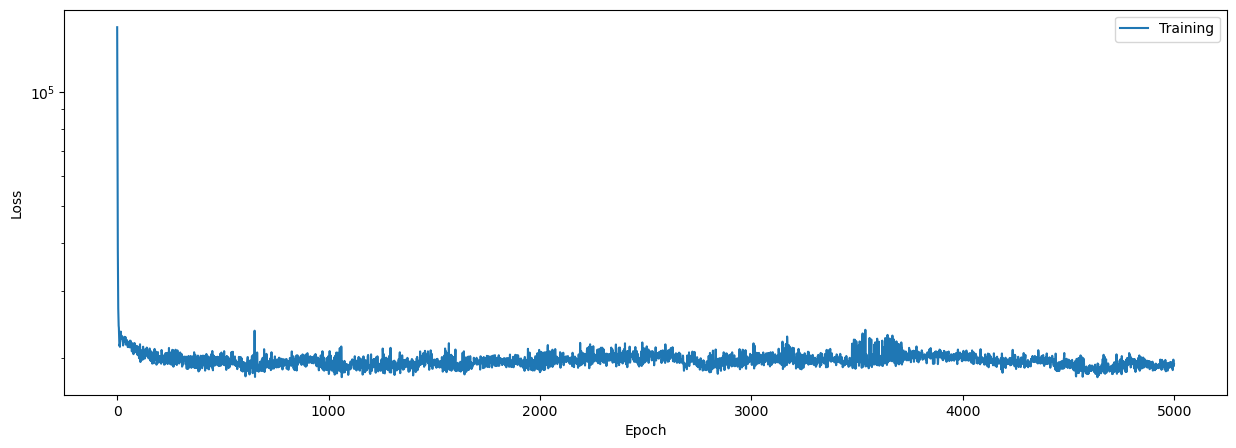

In [14]:
stats.plot(figsize=(15, 5))

In [15]:
output = net(input.to(device))
event = slayer.io.tensor_to_event(output.cpu().data.numpy())
output_anim = event.anim(plt.figure(figsize=(10, 10)))
# display.HTML(output_anim.to_jshtml())
output_anim.save('output.gif', animation.PillowWriter(fps=24), dpi=300)

html = '<table><tr>'
html += '<td>Output</td><td>Target</td></tr><tr>'
html += gif_td(f'output.gif')
html += gif_td(f'target.gif')
html += '</tr></table>'
display.HTML(html)

Output,Target
,


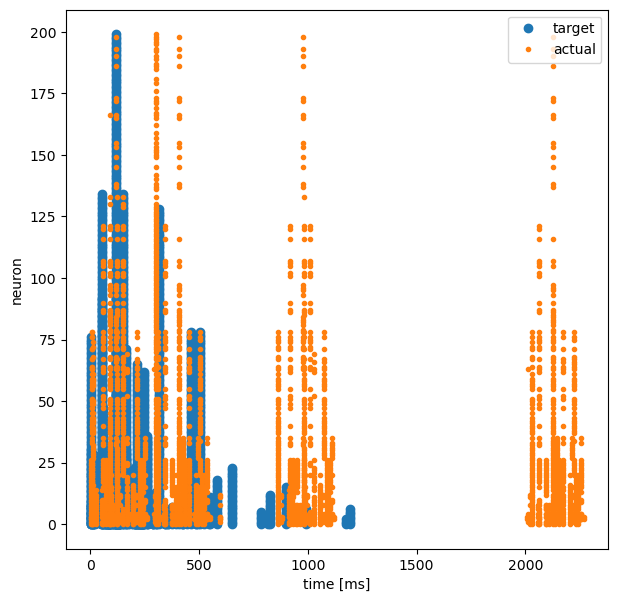

In [16]:
plt.figure(figsize=(7, 7))
plt.plot(trainingData.getSlayerEvents(0)[1].t, trainingData.getSlayerEvents(0)[1].x, '.', markersize=12, label='target')
plt.plot(event.t, event.x, '.', label='actual')
plt.xlabel('time [ms]')
plt.ylabel('neuron')
plt.legend()